# Stock Market Analysis of the S&P 500 Index using ARIMA and Seasonal ARIMA for forecasting

This post includes code and notes from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader
import datetime
import pandas_datareader.data as web

import statsmodels.api as sm
import quandl


In [107]:
start = datetime.datetime(1960, 1, 1)
end = pd.to_datetime('today')

In [108]:
SP500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH",start_date = start,end_date = end)
SP500

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22
...,...
2020-08-01,3391.71
2020-08-31,3500.31
2020-09-01,3526.65


In [109]:
df = SP500

In [110]:
df.head()

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22


In [111]:
df.tail()

,Value
Date,
2020-08-01,3391.71
2020-08-31,3500.31
2020-09-01,3526.65
2020-09-30,3363.00
2020-10-01,3380.80


** Clean Up**

Let's clean this up just a little!

In [112]:
df.columns = ['Value']
df.head()

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22


In [113]:
df.head()

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22


In [114]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Value,740.0,761.732932,834.566138,53.73,100.9,349.425,1239.415,3526.65


## Step 2: Visualize the Data

Let's visualize this data with a few methods.

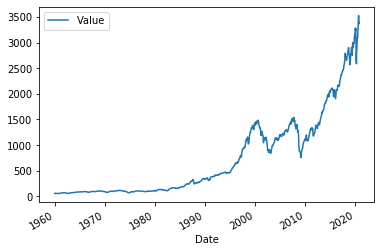

In [115]:
df.plot()

In [116]:
timeseries = df['Value']

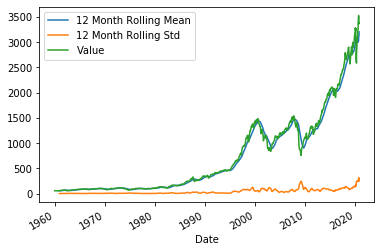

In [117]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

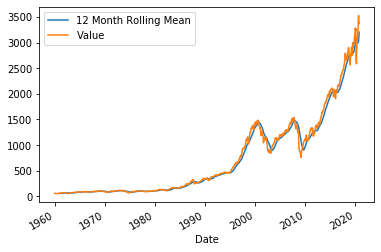

In [118]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

## Decomposition

ETS decomposition allows us to see the individual parts!

<Figure size 432x288 with 0 Axes>

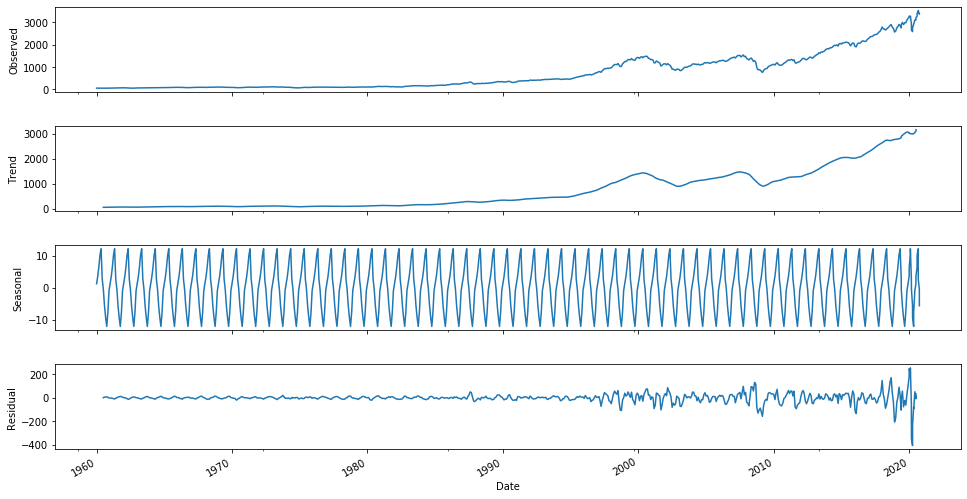

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Value'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

## Testing for Stationarity

In [120]:
df.head()

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22


In [121]:
from statsmodels.tsa.stattools import adfuller

In [122]:
result = adfuller(df['Value'])

In [123]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 1.7247353245135
p-value : 0.9981874531215522
#Lags Used : 20
Number of Observations Used : 719
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [124]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

** First Difference **

In [125]:
df['Value First Difference'] = df['Value'] - df['Value'].shift(1)

In [126]:
adf_check(df['Value First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.267790128581322
p-value : 0.0005048563860225925
#Lags Used : 20
Number of Observations Used : 718
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


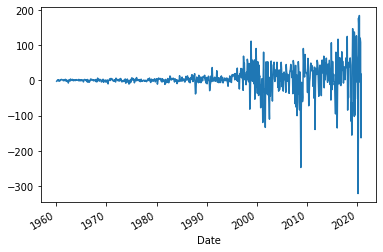

In [127]:
df['Value First Difference'].plot()

** Second Difference **

In [128]:
df['Value Second Difference'] = df['Value First Difference'] - df['Value First Difference'].shift(1)

In [129]:
adf_check(df['Value Second Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -12.29955077642857
p-value : 7.504260735615441e-23
#Lags Used : 18
Number of Observations Used : 719
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


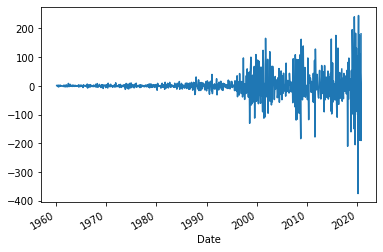

In [130]:
df['Value Second Difference'].plot()

** Seasonal Difference **

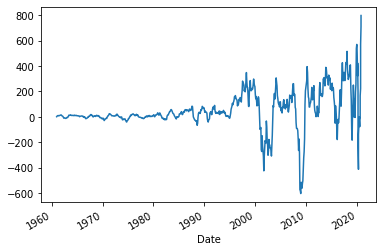

In [131]:
df['Seasonal Difference'] = df['Value'] - df['Value'].shift(12)
df['Seasonal Difference'].plot()

In [132]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.239903673260254
p-value : 7.284266188346342e-06
#Lags Used : 20
Number of Observations Used : 707
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


** Seasonal First Difference **

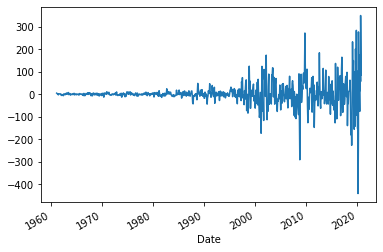

In [133]:
df['Seasonal First Difference'] = df['Value First Difference'] - df['Value First Difference'].shift(12)
df['Seasonal First Difference'].plot()

In [134]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.196739887980032
p-value : 5.940155101037563e-08
#Lags Used : 20
Number of Observations Used : 706
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [135]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

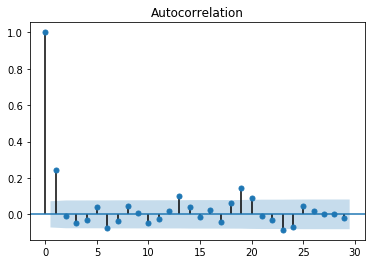

In [136]:
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
fig_first = plot_acf(df["Value First Difference"].dropna())

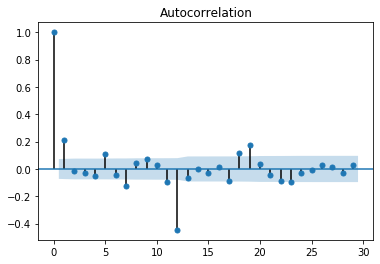

In [137]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

Pandas also has this functionality built in, but only for ACF, not PACF. So I recommend using statsmodels, as ACF and PACF is more core to its functionality than it is to pandas' functionality.

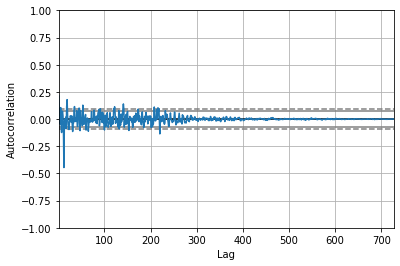

In [138]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

We can then plot this relationship:

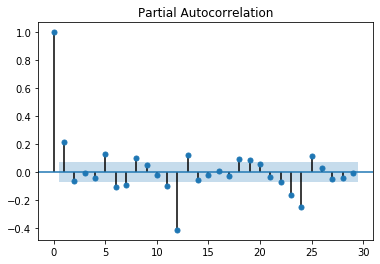

In [139]:
result = plot_pacf(df["Seasonal First Difference"].dropna())

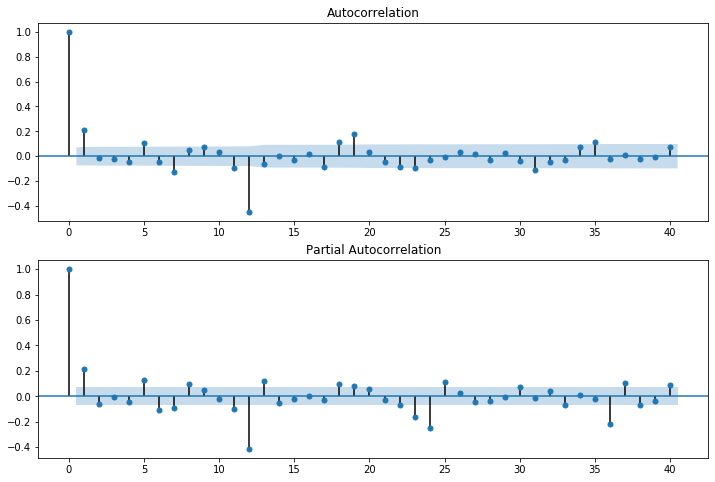

In [140]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [141]:
from statsmodels.tsa.arima_model import ARIMA

In [142]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


In [143]:
model = sm.tsa.statespace.SARIMAX(df['Value'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

/home/gao/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Value   No. Observations:                  740
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -3719.108
Date:                            Fri, 23 Oct 2020   AIC                           7444.215
Time:                                    09:03:22   BIC                           7457.982
Sample:                                         0   HQIC                          7449.528
                                            - 740                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0043      0.021      0.201      0.840      -0.037       0.046
ma.S.L12      -0.9513      0.018   

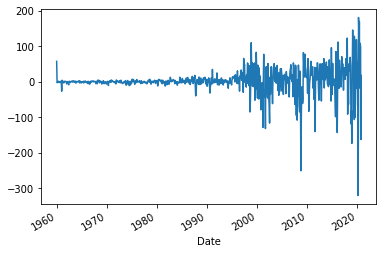

In [144]:
results.resid.plot()

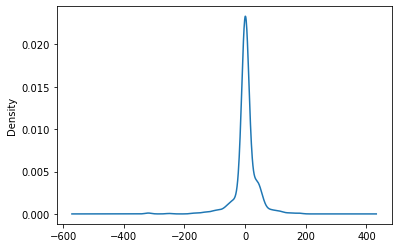

In [145]:
results.resid.plot(kind='kde')

## Prediction of Future Values

Firts we can get an idea of how well our model performs by just predicting for values that we actually already know:

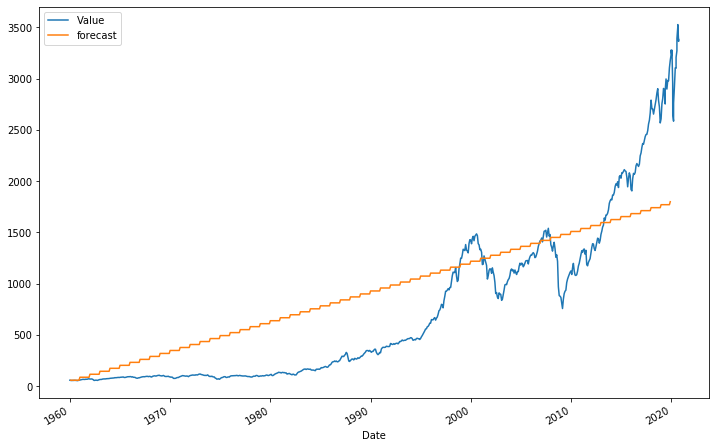

In [166]:
df['forecast'] = results.predict(start = 1, end= 720, dynamic= True)  
df[['Value','forecast']].plot(figsize=(12,8))

### Forecasting

In [167]:
df.tail()

,Value,Value First Difference,Value Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Date,,,,,,
2020-08-01,3391.71,120.59,57.09,166.67,173.75,NaN
2020-08-31,3500.31,108.60,-11.99,223.00,56.33,NaN
2020-09-01,3526.65,26.34,-82.26,571.84,348.84,NaN
2020-09-30,3363.00,-163.65,-189.99,710.61,138.77,NaN
2020-10-01,3380.80,17.80,181.45,796.21,85.60,NaN


In [168]:
from pandas.tseries.offsets import DateOffset

In [169]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]

In [150]:
future_dates

[Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00')]

In [170]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [171]:
future_df = pd.concat([df,future_dates_df])

In [172]:
future_df.head()

,Value,Value First Difference,Value Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1960-01-01,58.03,NaN,NaN,NaN,NaN,NaN
1960-02-01,55.78,-2.25,NaN,NaN,NaN,58.03
1960-03-01,55.02,-0.76,1.49,NaN,NaN,58.03
1960-04-01,55.73,0.71,1.47,NaN,NaN,58.03
1960-05-01,55.22,-0.51,-1.22,NaN,NaN,58.03


In [173]:
future_df.tail()

,Value,Value First Difference,Value Second Difference,Seasonal Difference,Seasonal First Difference,forecast
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN


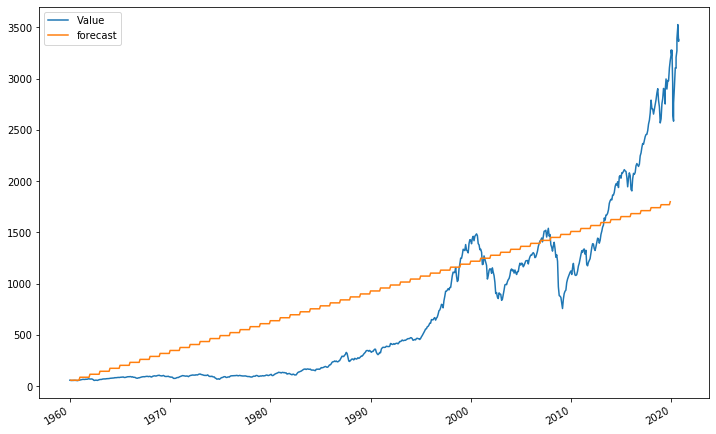

In [177]:
future_df['forecast'] = results.predict(start = 1, end = 720, dynamic= True)  
future_df[['Value', 'forecast']].plot(figsize=(12, 8)) 